## THÍ NGHIỆM KẾ HOẠCH SƠ TÁN NGẪU NHIÊN GIAI ĐOẠN ĐẦU $\\[-0.2cm]$
## TRÊN MẠNG LƯỚI VUÔNG

### Inport module networkx và các thư viện, biến chính trong chương trình

Thí nghiệm này được hiện thực và xây dựng dựa vào module $networkx$ trên ngôn ngữ Python.

Khai báo một số thư viện và biến chính sử dụng trong chương trinh.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from   random import randint
import numpy as np
from   copy import deepcopy

grid_size = 7
num_nodes = grid_size**2

# number of cars = coeff*max_flow
coeff_of_num_cars = 1
num_cars = np.NAN
total_cost = np.NAN
inf = 999

## Thực thí nghiệm theo các bước:


### Bước 1: Khởi tạo mạng lưới

Tạo mạng lưới vuông $7\times7$, đồng thời sinh ngẫu nhiên khả năng thông qua và chi phí phạt trên mỗi cung

Giả sử: chi phí phạt $p_{ij}$ trên mỗi cung là ngẫu nhiên thuộc $[10, 50]$,
        khả năng thông qua $u_{ij}$ trên mỗi cung thuộc $[100, 500]$.

In [2]:
G = nx.DiGraph()

for i in range(1, num_nodes+1):
    if i % grid_size == 1:
        G.add_node(i, color='#DC562C') # các nút nguồn
    elif i % grid_size == 0:
        G.add_node(i, color='#4FD92F') # sink nodes
    else:
        G.add_node(i, color='#FFFFFF') # intermediate nodes

for i in range(1, num_nodes+1):
    if i % grid_size == 0: # nếu là các nút đích
        if i + grid_size <= num_nodes:
            G.add_edge(i, i + grid_size, u=randint(100, 500), p=randint(10, 50))
    else:
        if i + 1 <= num_nodes:
            G.add_edge(i, i + 1,u=randint(100, 500), p=randint(10, 50))
        if i + grid_size <= num_nodes:
            G.add_edge(i, i + grid_size, u=randint(100, 500), p=randint(10, 50))


Hiển thị mạng lưới đã khởi tạo:

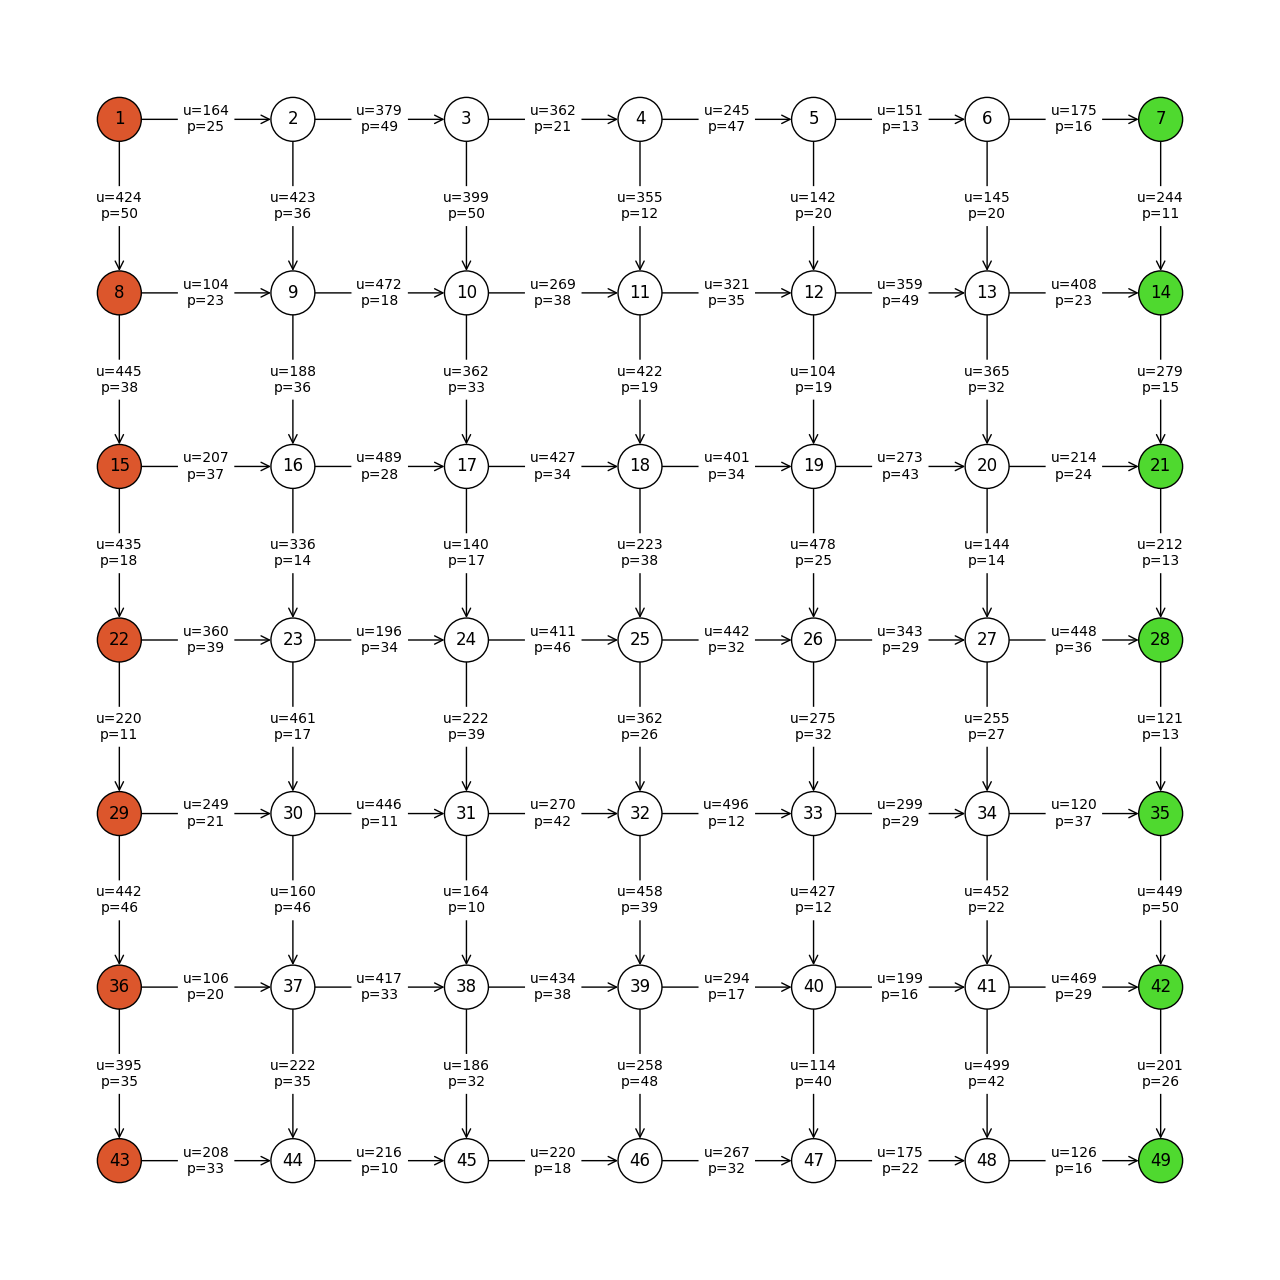

In [3]:
# điều chỉnh kích thước cửa sổ hiển thị
plt.rcParams.update({'figure.figsize': (grid_size*1.8, grid_size*1.8)})

# xác định vị trí các nút
node_pos = {i: ((i-1) % grid_size, grid_size - ((i-1) // grid_size)) for i in range(1, num_nodes+1)}

# lấy thông tin về màu sắc của các nút
node_colors = list(nx.get_node_attributes(G, 'color').values())

# thiết lập hiển thị nhãn trên các cung
edges_label1 = nx.get_edge_attributes(G,'u')
edges_label2 = nx.get_edge_attributes(G,'p')
edges_label  = {k: "u={l1}\np={l2}".format(l1=edges_label1[k], l2=edges_label2[k]) for k in edges_label1}

# thiết lập các hình thức khi hiển thị
nx.draw(G, pos=node_pos, with_labels=True, node_color=node_colors, edgecolors='black',  arrowsize=15, arrowstyle='->', node_size=1000, font_size=12, width=1.0) 
nx.draw_networkx_edge_labels(G, pos=node_pos, edge_labels=edges_label, rotate = False, font_size=10)
plt.show()

### Bước 2: Chuyển đổi mạng

Thực hiện việc thêm siêu nguồn $S$ và siêu đích $T$ vào mạng lưới với khả năng thông qua giữa các nguồn này với mạng là $+\infty$ để chuẩn bị cho việc tìm luồng cực đại.

In [4]:
for i in range(1, num_nodes+1):
    if i % grid_size == 1:
        G.add_edge('S', i, u=inf)
    elif i % grid_size == 0:
        G.add_edge(i, 'T', u=inf)

G.nodes['S']['color'] = '#DC562C'
G.nodes['T']['color'] = '#4FD92F'

Hiển thị mạng lưới sau khi chuyển đổi:

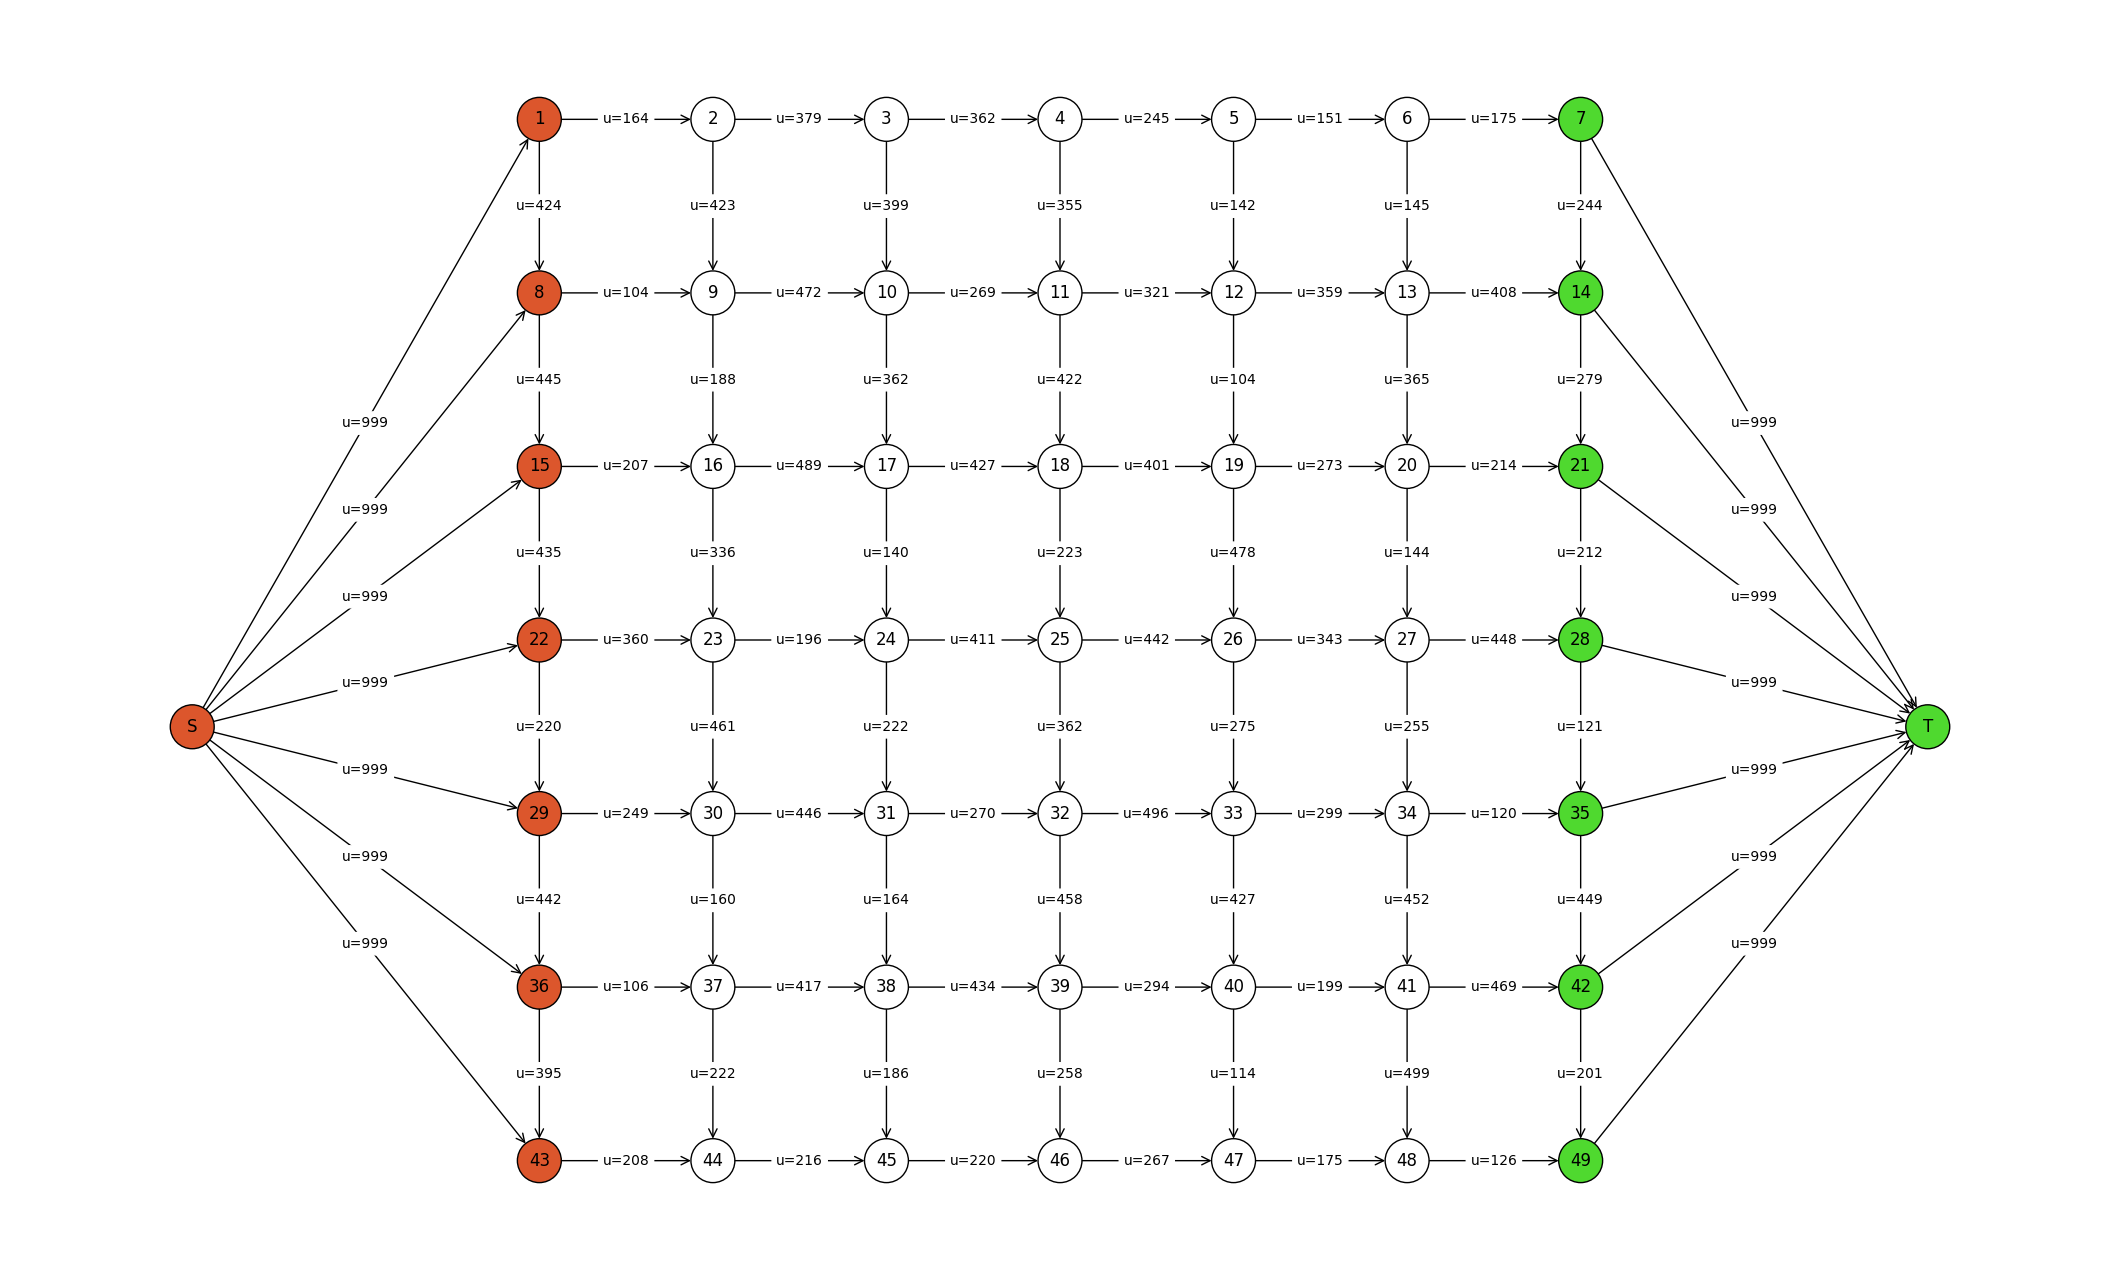

In [5]:
plt.rcParams.update({'figure.figsize': (grid_size*3.0, grid_size*1.8)})

node_pos = {i: ((i-1) % grid_size, grid_size - ((i-1) // grid_size)) for i in range(1, num_nodes+1)}
node_pos.update({'S': (-2, grid_size/2), 'T': (grid_size+1, grid_size/2)})

node_colors = list(nx.get_node_attributes(G, 'color').values())

edges_label = nx.get_edge_attributes(G,'u')
edges_label  = {k: "u={l1}".format(l1=edges_label[k]) for k in edges_label}

nx.draw(G, pos=node_pos, with_labels=True, node_color=node_colors, edgecolors='black',  arrowsize=15, arrowstyle='->', node_size=1000, font_size=12, width=1.0)
nx.draw_networkx_edge_labels(G, pos=node_pos, edge_labels=edges_label, rotate = False, font_size=10)
plt.show()

### Bước 3: Tìm luồng cực đại

Dùng hàm $maximum\_flow()$ cúa module $networkx$ để tìm giá trị luồng cực đại trong mạng đã sinh.

In [6]:
# hàm trả về giá trị luồng cực đại trong mạng
# và một dictionary chứa các giá trị luồng trên các cạnh
max_flow, flowDict = nx.maximum_flow(G, 'S', 'T', capacity='u')

Từ dictionary trả về, xác định giá trị luồng $x_{ij}$ trên mỗi cung:

In [7]:
for node1 in flowDict:
    for node2 in list(flowDict[node1]):
        G.edges[node1, node2]['x'] = flowDict[node1][node2]

Hiển thị mạng lưới với luồng cực đại vừa tìm được:

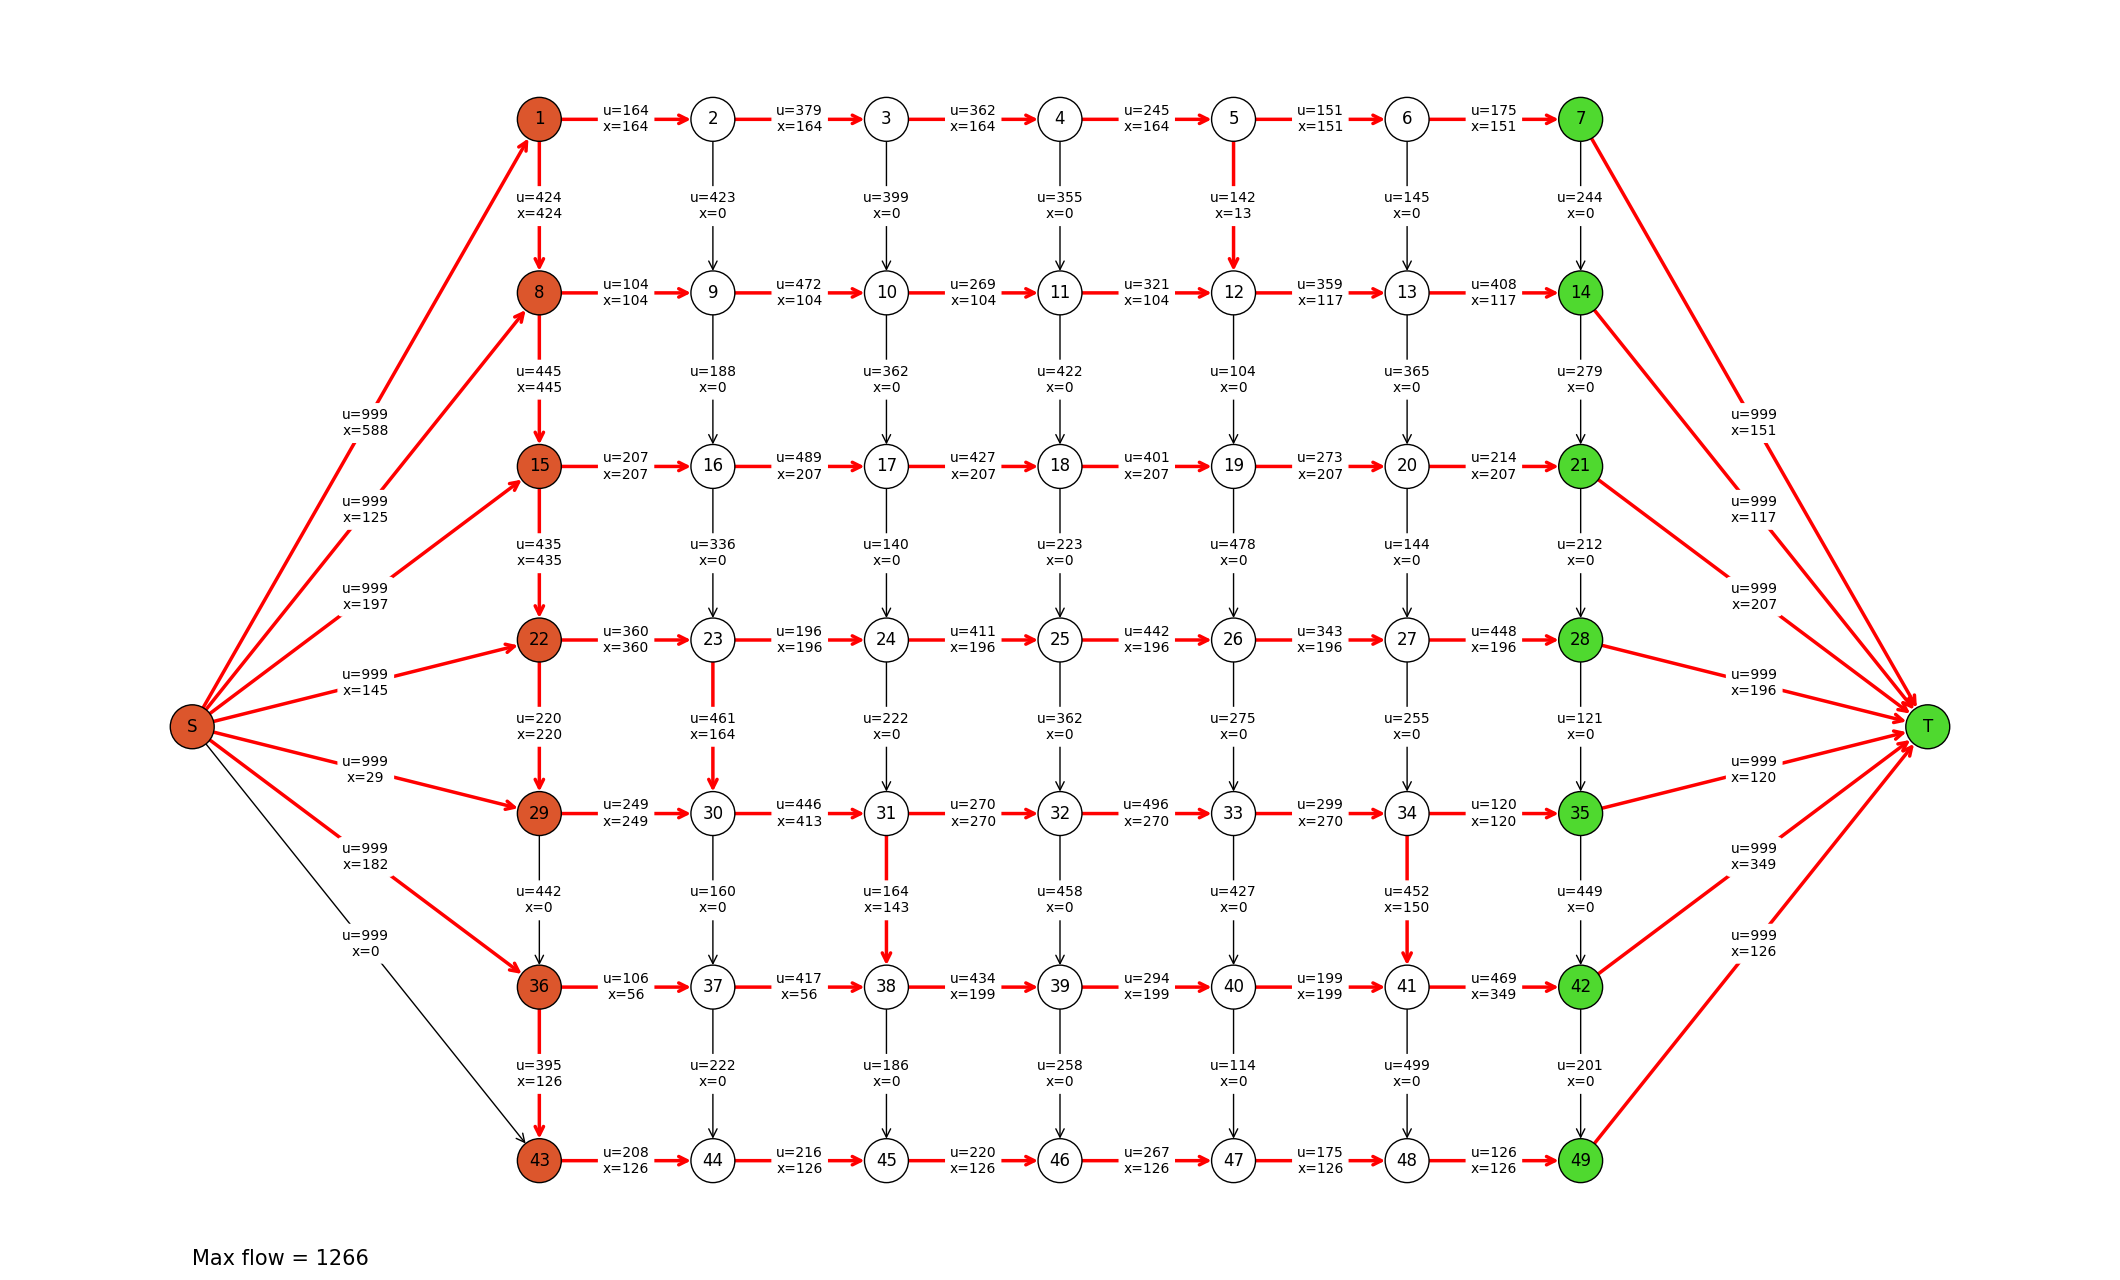

In [8]:
edges_label2 = nx.get_edge_attributes(G,'u')
edges_label3 = nx.get_edge_attributes(G,'x')
edges_label  = {k: "u={l2}\nx={l3}".format(l2=edges_label2[k], l3=edges_label3[k]) for k in edges_label2}


edges_colors = []
edges_size = []
for edge in G.edges:
    if G.edges[edge]['x'] == 0:
        edges_colors.append('black')
        edges_size.append(1.0)
    else:
        edges_colors.append('red')
        edges_size.append(2.5)

nx.draw(G, pos=node_pos, with_labels=True, node_color=node_colors, edgecolors='black', arrowsize=15, edge_color=edges_colors, arrowstyle='->', node_size=1000, font_size=12, width=edges_size) 
nx.draw_networkx_edge_labels(G, pos=node_pos, edge_labels=edges_label, rotate = False, font_size=10)
plt.text(min(node_pos[key][0] for key in node_pos), min(node_pos[key][1]-0.6 for key in node_pos), "Max flow = {f}".format(f=max_flow), fontsize=15)
plt.show()

### Bước 4: Tìm chi phạt cực tiểu trên mạng
Trước khi thực hiện, cần hiện thực một số hàm hỗ trợ:

#### Bước 4.1: Gán chi phí phạt giữa các siêu nút với mạng lưới bằng $0$:

In [9]:
for i in range(1, num_nodes+1, grid_size):
    G.edges['S', i]['p'] = 0
    G.edges[i+grid_size-1, 'T']['p'] = 0

#### Bước 4.2: Hàm sinh một danh sách $n$ phần tử có tổng xác định:

In [10]:
"""Tạo một danh sách n số ngẫu nhiên có tổng bằng total, có thể chứ số 0"""
def generate_random_array(n, total):
    # Nếu n lớn hơn total, cần thêm các số 0 vào mảng
    if n > total:
        non_zero_elements = min(n, total)
        dividers = sorted(np.random.choice(range(1, total),
                        non_zero_elements - 1, replace=True))
        differences = np.concatenate(([0], dividers, [total]))[1:] - np.concatenate(([0], dividers, [total]))[:-1]
        # Thêm các số không vào các phần tử trống
        zeros_to_add = n - non_zero_elements
        result = np.concatenate((differences, np.zeros(zeros_to_add)))
    else:
        dividers = sorted(np.random.choice(range(1, total), 
                        n - 1, replace=True))
        result = np.concatenate(([0], dividers, [total]))[1:] - np.concatenate(([0], dividers, [total]))[:-1]

    # Trộn các phần tử trong danh sách result
    np.random.shuffle(result)
    return result

# Ví dụ sử dụng
# array = generate_random_array(7, 1)
# print(array)
# array = generate_random_array(7, 3)
# print(array)
# array = generate_random_array(7, 15)
# print(array)
# array = generate_random_array(7, 1000)
# print(array)
# array = generate_random_array(7, 10000)
# print(array)

#### Bước 4.3: Hàm phân phối ngẫu nhiên xe vào các nút nguồn/đích trên mạng lưới:

In [11]:
def assign_att():
    # Sinh ngẫu nhiên các mảng 7 phần từ có tổng bằng số lượng xe cần thí nghiệm 
    source_cars = generate_random_array(grid_size, num_cars)
    desti_cars  = generate_random_array(grid_size, num_cars)
    
    for i in range(1, num_nodes+1, grid_size):
        # nút nguồn có di < 0
        G.nodes[i]['d'] = -int(source_cars[i//grid_size])
        G.nodes[i+grid_size-1]['d'] = int(desti_cars[i//grid_size])

### Bước 4.4: Hàm chuyển đổi giá trị của các nhãn để đưa mạng về mạng một nguồn -- một đích:

In [12]:
def convert_car_to_super_nodes(graph):
    for i in range(1, num_nodes+1, grid_size):
        # uSi = |di|
        graph.edges['S', i]['u'] = -graph.nodes[i]['d']
        # xoá nhãn di của nút i
        del graph.nodes[i]['d']
        # tương tự cho siêu đích
        graph.edges[i+grid_size-1, 'T']['u'] = graph.nodes[i+grid_size-1]['d']
        del graph.nodes[i+grid_size-1]['d']
    
    # dS = -sum(|di|) = -(tổng số xe)
    graph.nodes['S']['d'] = -num_cars
    graph.nodes['T']['d'] = num_cars

### Các hàm tự định nghĩa để hiển thị mạng lưới ra màn hình:

In [13]:
def showGraph(graph, flag=False):

    edges_label1 = nx.get_edge_attributes(graph,'p')
    edges_label2 = nx.get_edge_attributes(graph,'u')
    edges_label  = {k: "p={l1}\nu={l2}".format(l1=edges_label1[k], l2=edges_label2[k]) for k in edges_label1}

    nodes_label = nx.get_node_attributes(graph, 'd')
    nodes_label = {k: "d={l1}".format(l1=nodes_label[k]) for k in nodes_label}
    node_label_pos = {node: (x-0.20, y+0.15) for node, (x, y) in node_pos.items()}
    node_label_pos['S'] = (node_label_pos['S'][0]+0.1, node_label_pos['S'][1]-0.35)
    node_label_pos['T'] = (node_label_pos['T'][0]+0.3, node_label_pos['T'][1]-0.35)

    nx.draw(graph, pos=node_pos, with_labels=True, node_color=node_colors, edgecolors='black',  arrowsize=15, edge_color='black', arrowstyle='->', node_size=1000, font_size=12, width=1.0) 
    nx.draw_networkx_labels(graph, node_label_pos, labels=nodes_label, font_size=10)
    nx.draw_networkx_edge_labels(graph, pos=node_pos, edge_labels=edges_label, rotate = False, font_size=10)
    plt.text(min(node_pos[key][0] for key in node_pos), min(node_pos[key][1]-0.6 for key in node_pos), 
             "Max flow={f}\nNumber of cars={n}={cf}*Max flow\nThis random generation case is{st}satisfied"
             .format(f=max_flow, n=num_cars, cf=coeff_of_num_cars, st=" not " if flag == False else " "), fontsize=15)
    plt.show()


def showGraphPath(graph, loop_time=0):
    for node1 in flowDict:
        for node2 in list(flowDict[node1]):
            graph.edges[node1, node2]['x'] = flowDict[node1][node2]
    
    plt.rcParams.update({'figure.figsize': (grid_size*3.0, grid_size*1.8)})

    edges_label1 = nx.get_edge_attributes(graph,'p')
    edges_label2 = nx.get_edge_attributes(graph,'u')
    edges_label3 = nx.get_edge_attributes(graph,'x')
    edges_label  = {k: "p={l1}\nu={l2}\nx={l3}".format(l1=edges_label1[k], l2=edges_label2[k], l3=edges_label3[k]) for k in edges_label1}


    nodes_label = nx.get_node_attributes(graph, 'd')
    nodes_label = {k: "d={l1}".format(l1=nodes_label[k]) for k in nodes_label}
    node_label_pos = {node: (x, y-0.25) for node, (x, y) in node_pos.items()}

    edges_colors = []
    edges_size = []
    for edge in graph.edges:
        if graph.edges[edge]['x'] == 0:
            edges_colors.append('black')
            edges_size.append(1.0)
        else:
            edges_colors.append('red')
            edges_size.append(2.5)

    nx.draw(graph, pos=node_pos, with_labels=True, node_color=node_colors, edgecolors='black', arrowsize=15, edge_color=edges_colors, arrowstyle='->', node_size=1000, font_size=12, width=edges_size) 
    nx.draw_networkx_labels(graph, node_label_pos, labels=nodes_label, font_size=10)
    nx.draw_networkx_edge_labels(graph, pos=node_pos, edge_labels=edges_label, rotate = False, font_size=10)
    plt.text(min(node_pos[key][0] for key in node_pos), min(node_pos[key][1]-0.8 for key in node_pos), 
            "Max flow={f}\nNumber of cars={n}={cf}*Max flow\nTotal minimum penalty cost f(X)={c}\nThe number of unsatisfied random generation: {l}"
            .format(f=max_flow, n=num_cars, c=total_cost, l=loop_time, cf=coeff_of_num_cars), fontsize=15)
    plt.show()

Thực hiện thí nghiệm với số xe $n=1$:

In [14]:
# num_cars = 1
# # Phân phối 1 xe vào đỉnh nguồn/đích ngẫu nhiên
# assign_att()
# # Sao chép mạng 
# H = deepcopy(G)
# # Chuyển đổi giá trị các nhãn sang mạng một nguồn - một đích
# convert_car_to_super_nodes(H)
# '''Hàm trả về chi phí phạt nhỏ nhất và một dictionary chứa giá trị
#    luồng xij trên các cung dựa trên khả năng thông qua U(i, j),
#    chi phí phạt mỗi xe P(i, j) và số lượng xe D(i) tại các siêu nút'''
# total_cost, flowDict = nx.capacity_scaling(H, capacity='u', weight='p', demand='d')              
# # Hàm tự định nghĩa, thiết lập các giao diện để hiện thị mạng lưới
# showGraphPath(H)
# # Gán lại mạng đã chuyển đổi cho mạng ban đầu
# G = H

Vòng lặp thực hiện các thí nghiệm với sự phân bố xe vào các nút nguồn/đích ngẫu nhiên khác nhau để tìm được một thí nghiệm có kế hoạch thoả mãn.

Lần lượt thay đổi hệ số $coeff\_of\_num\_cars$ để thực hiện thí nghiệm với số xe $n = \dfrac{1}{4}MF$, $n = \dfrac{1}{2}MF$, $n = \dfrac{3}{4}MF$, $n = MF$.

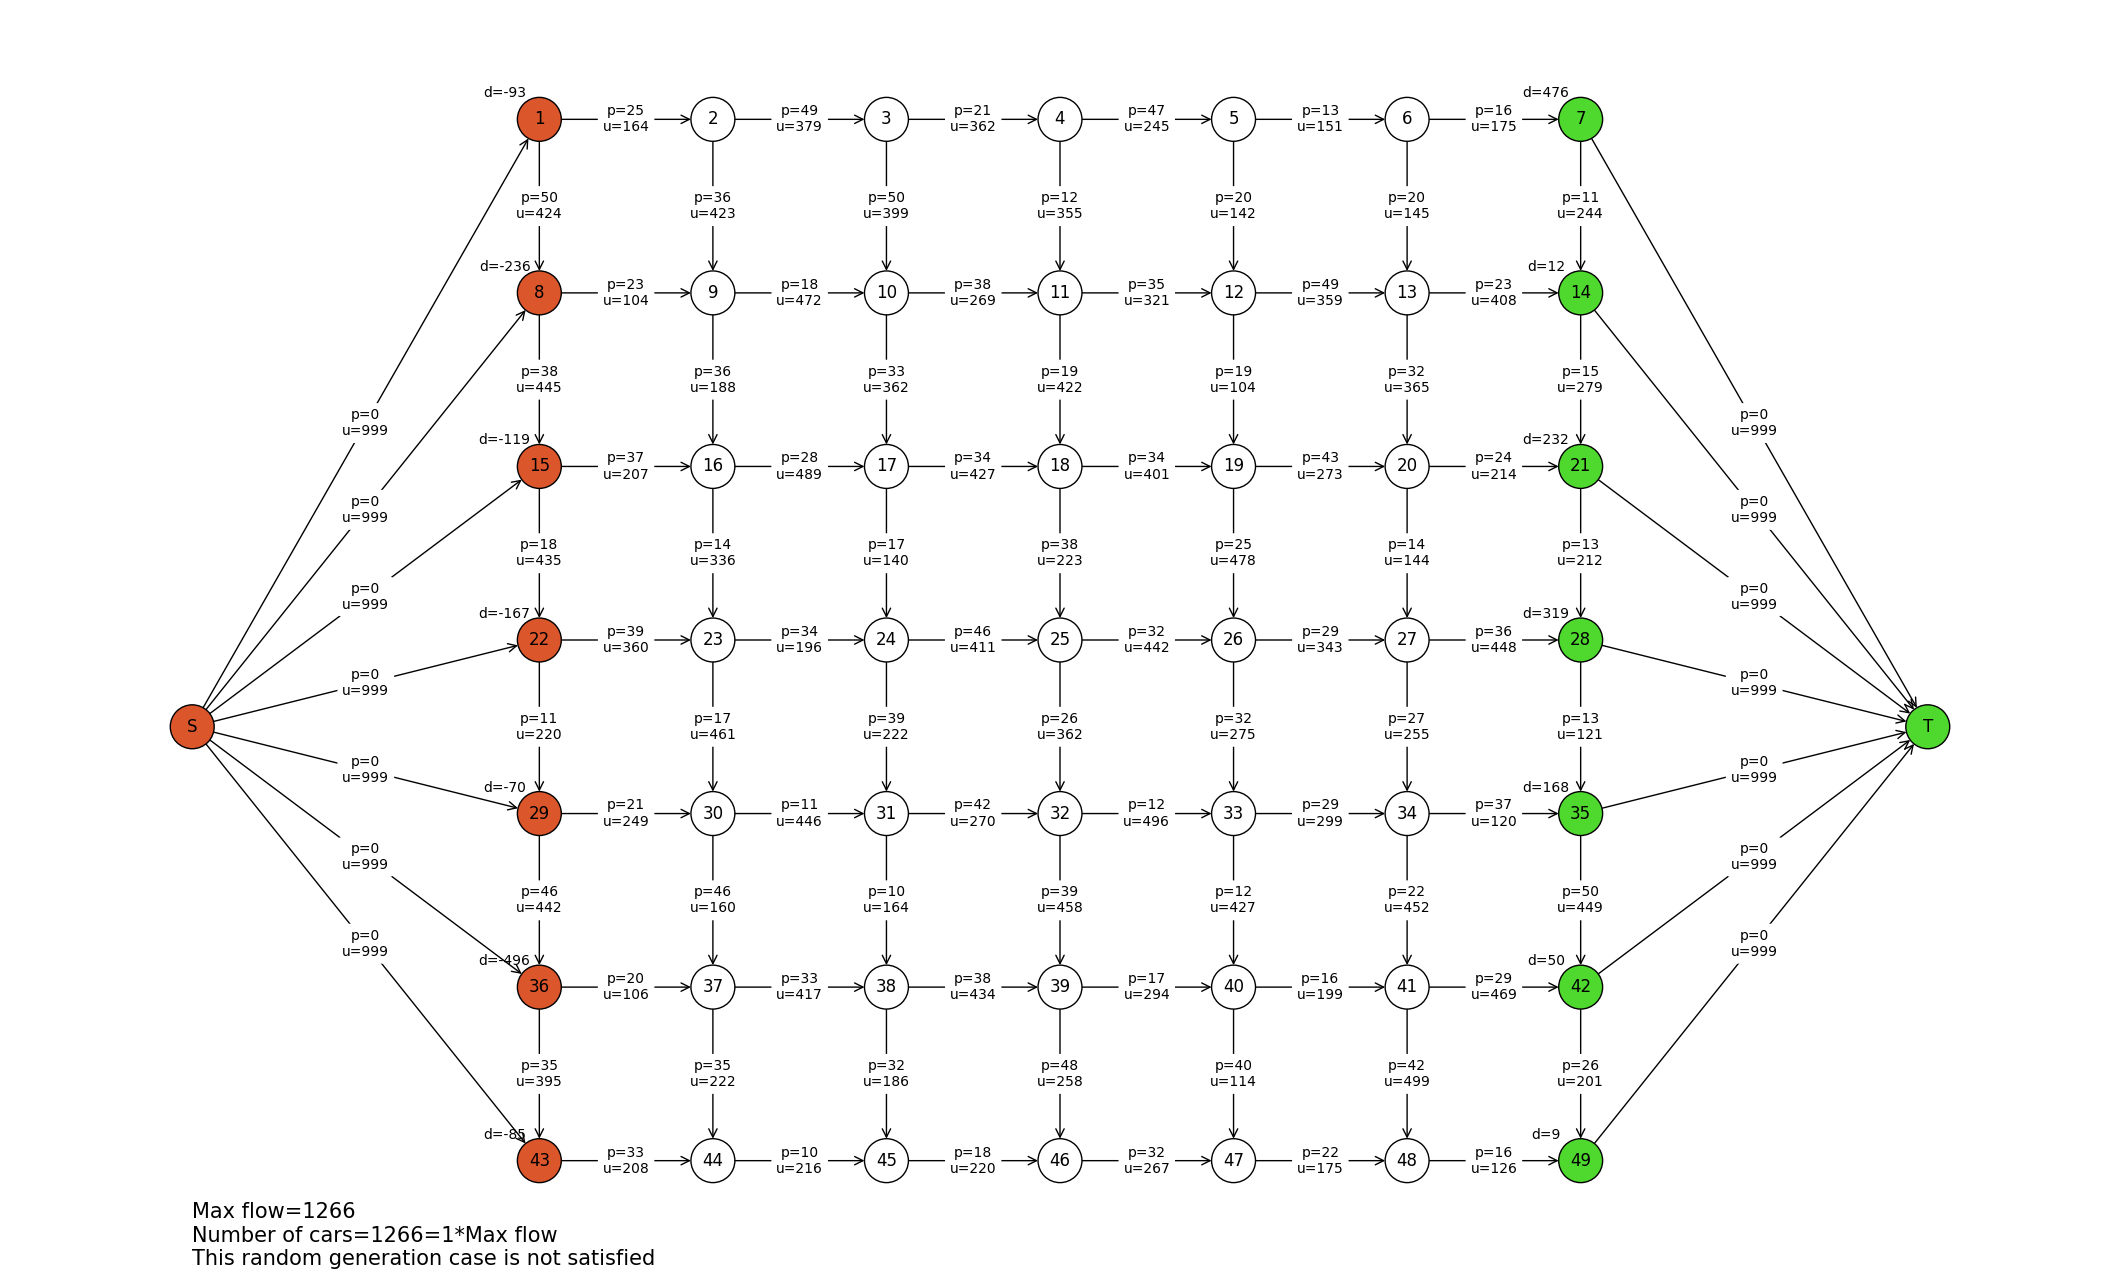

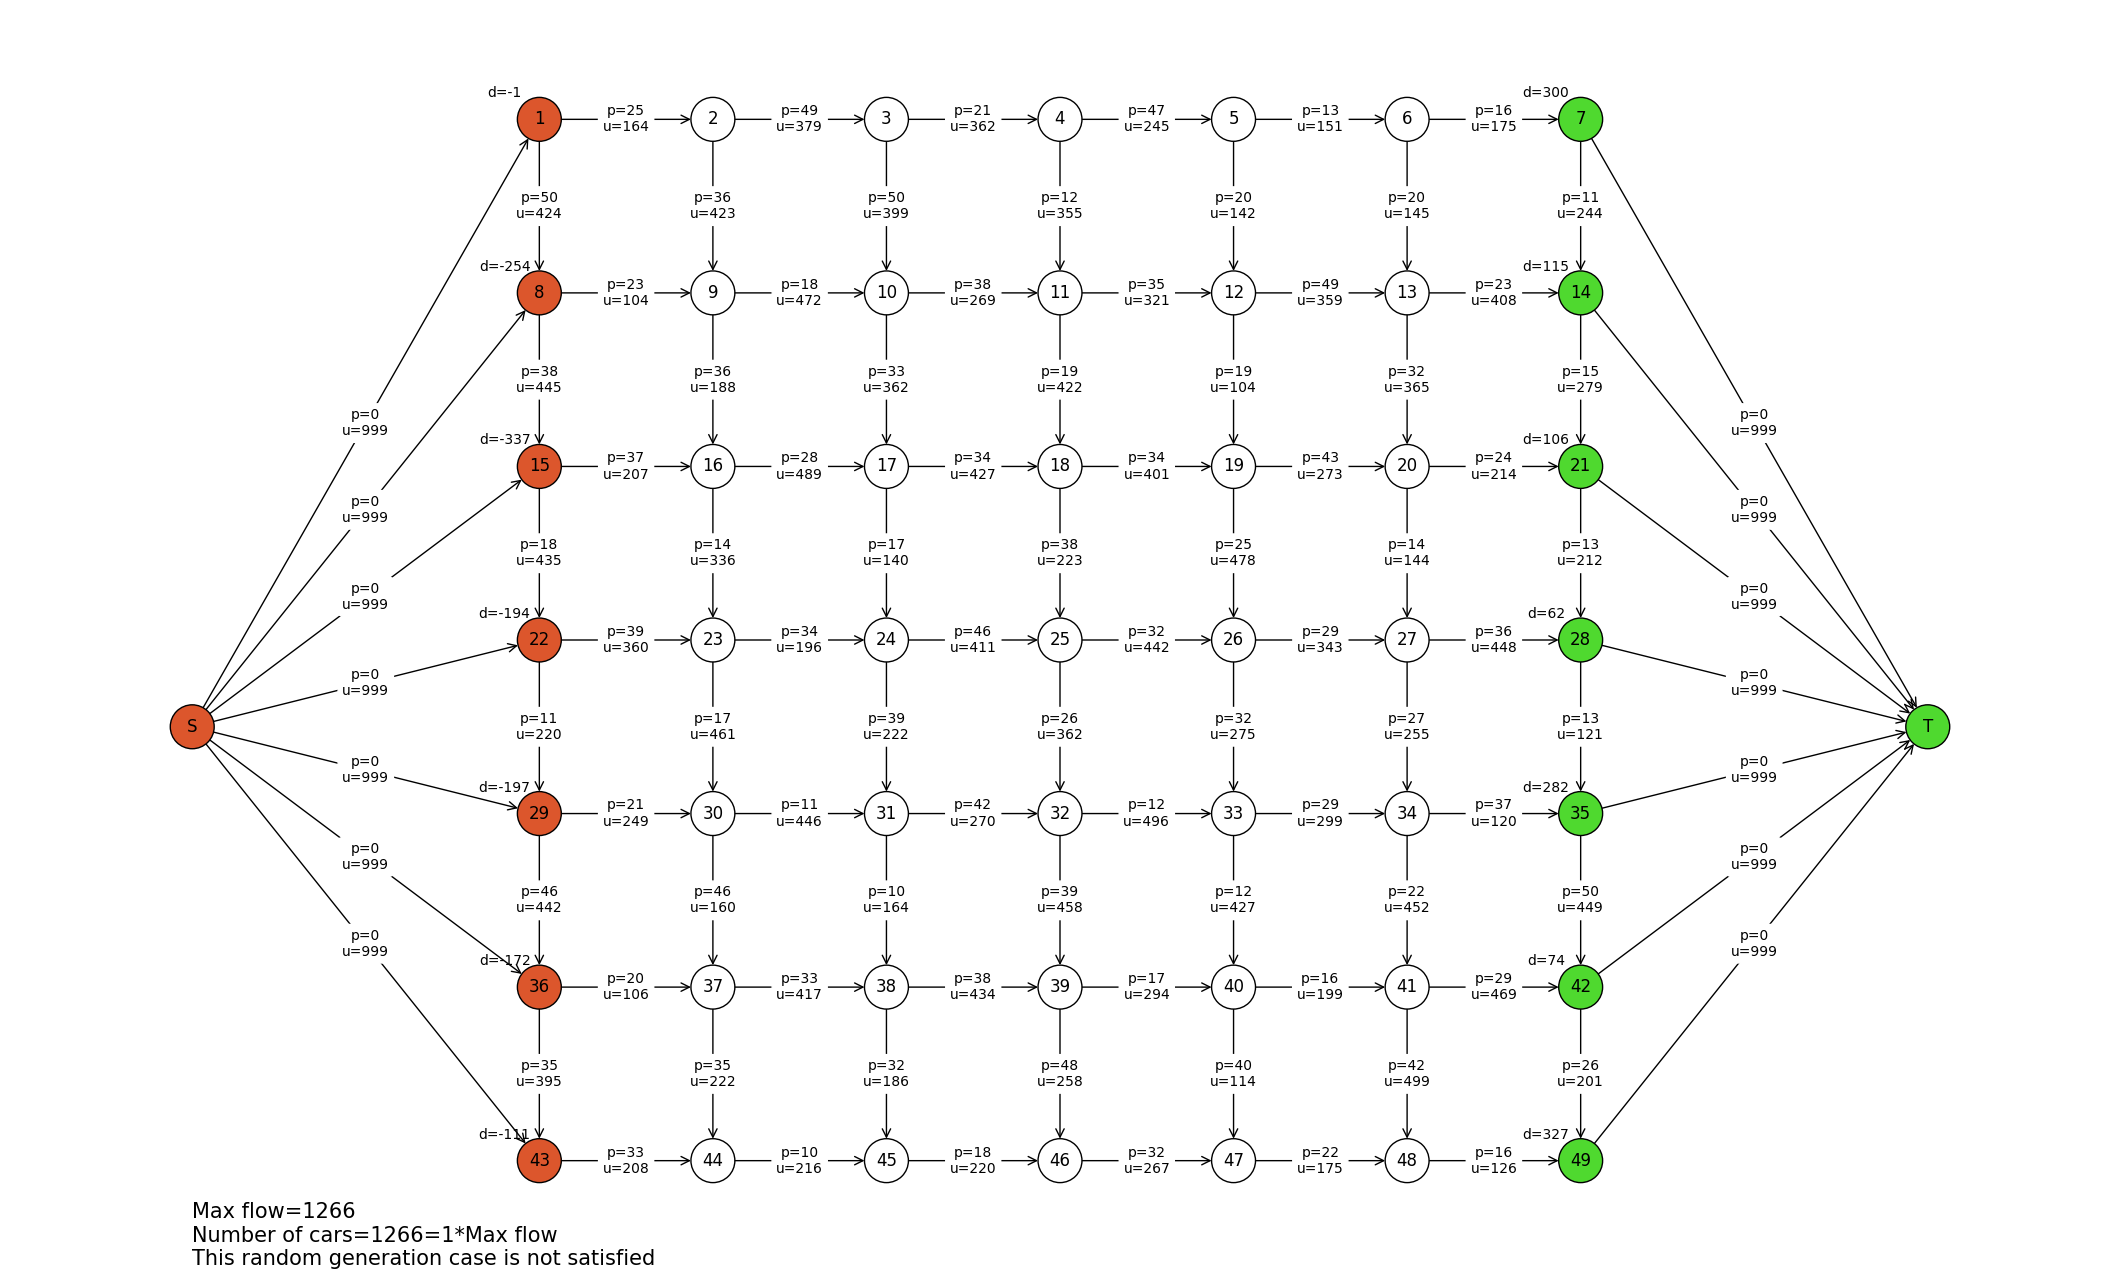

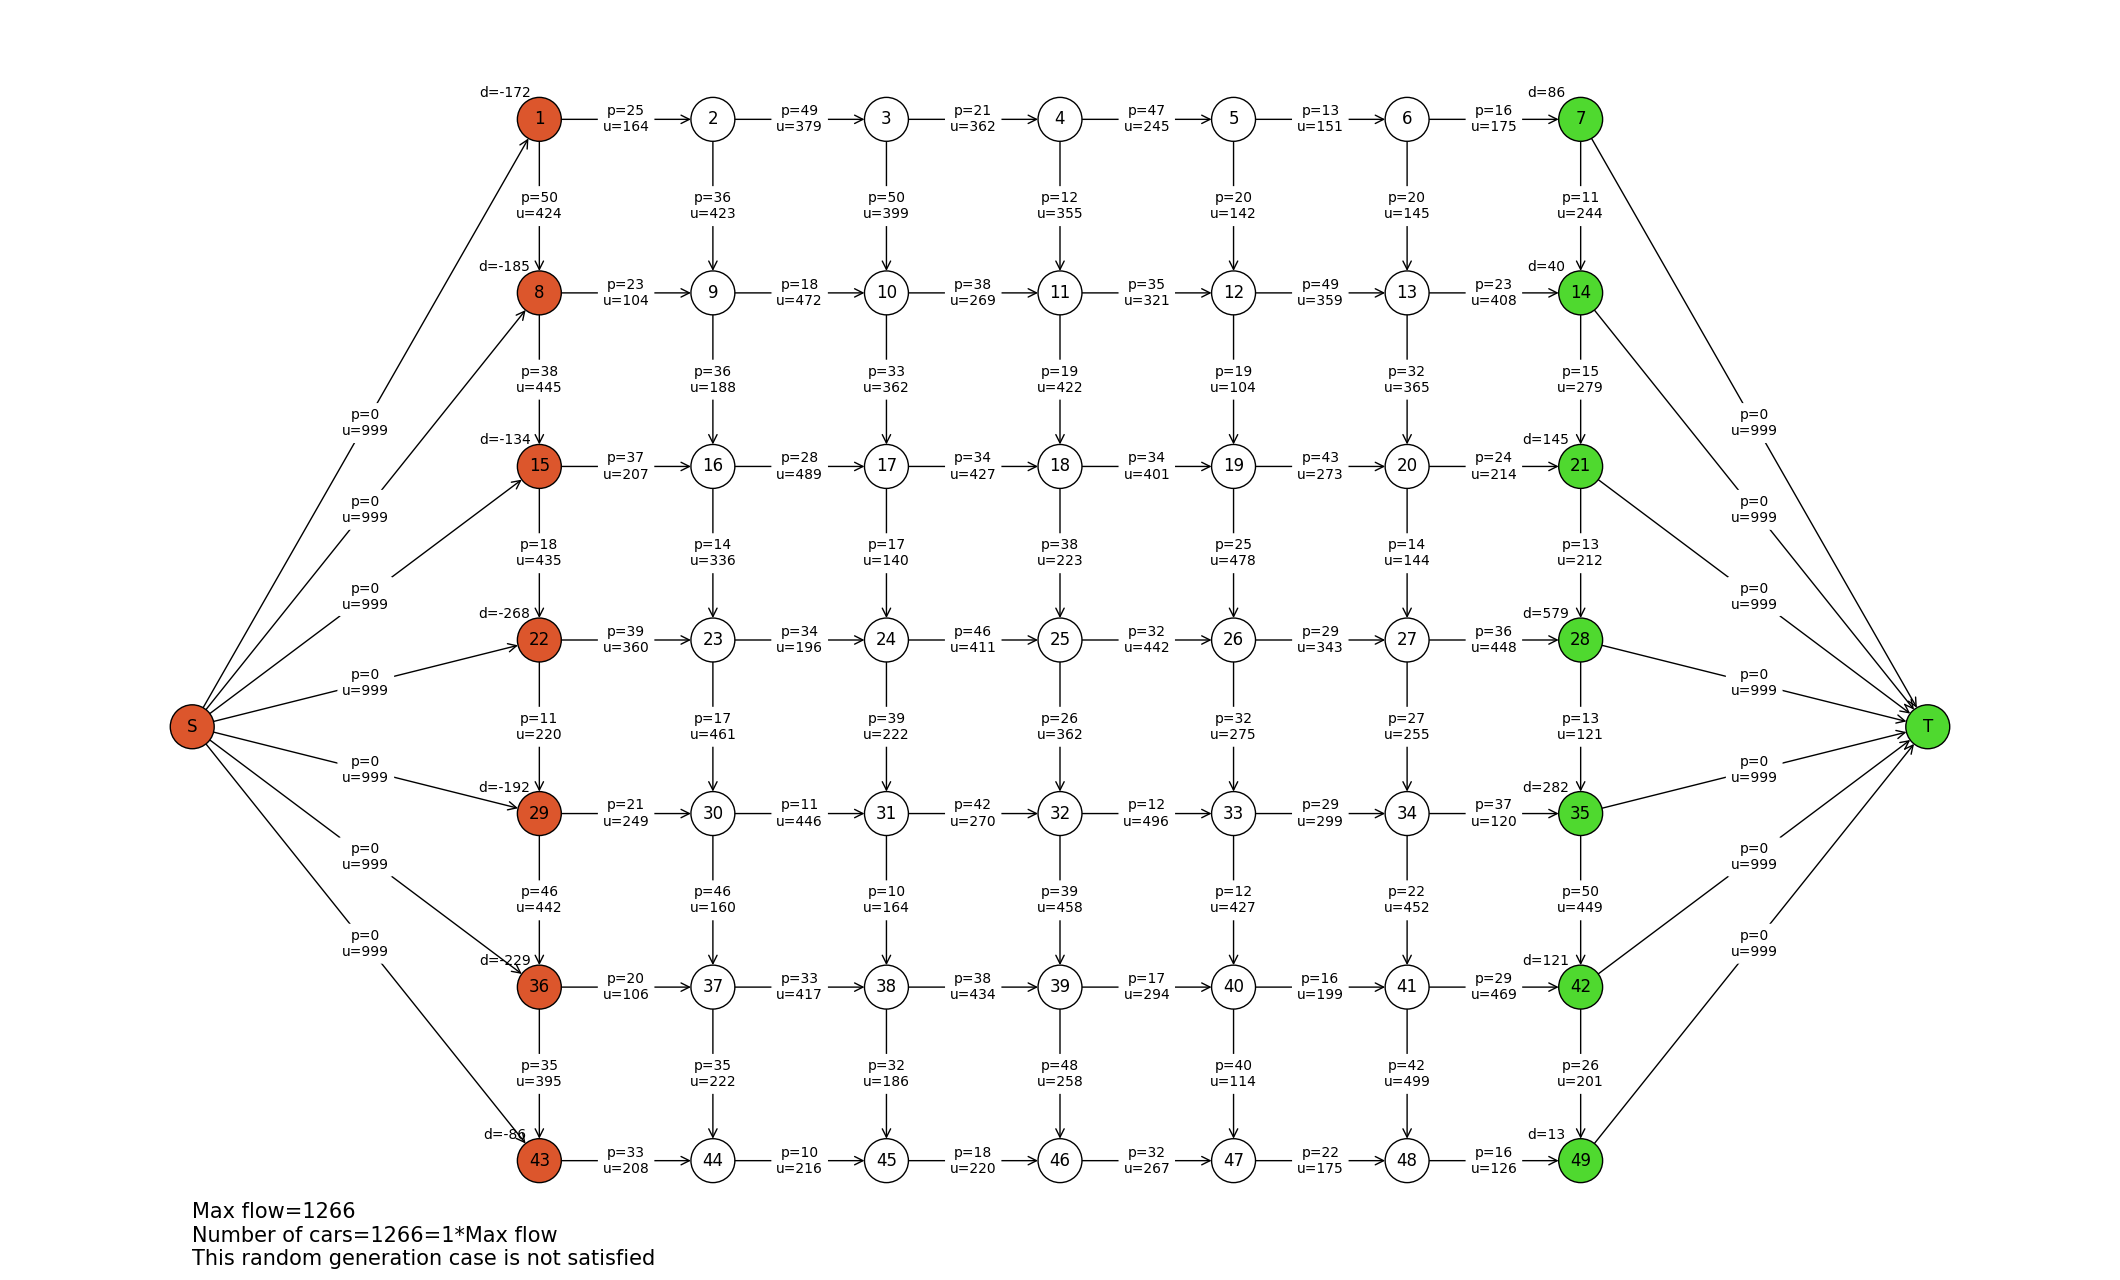

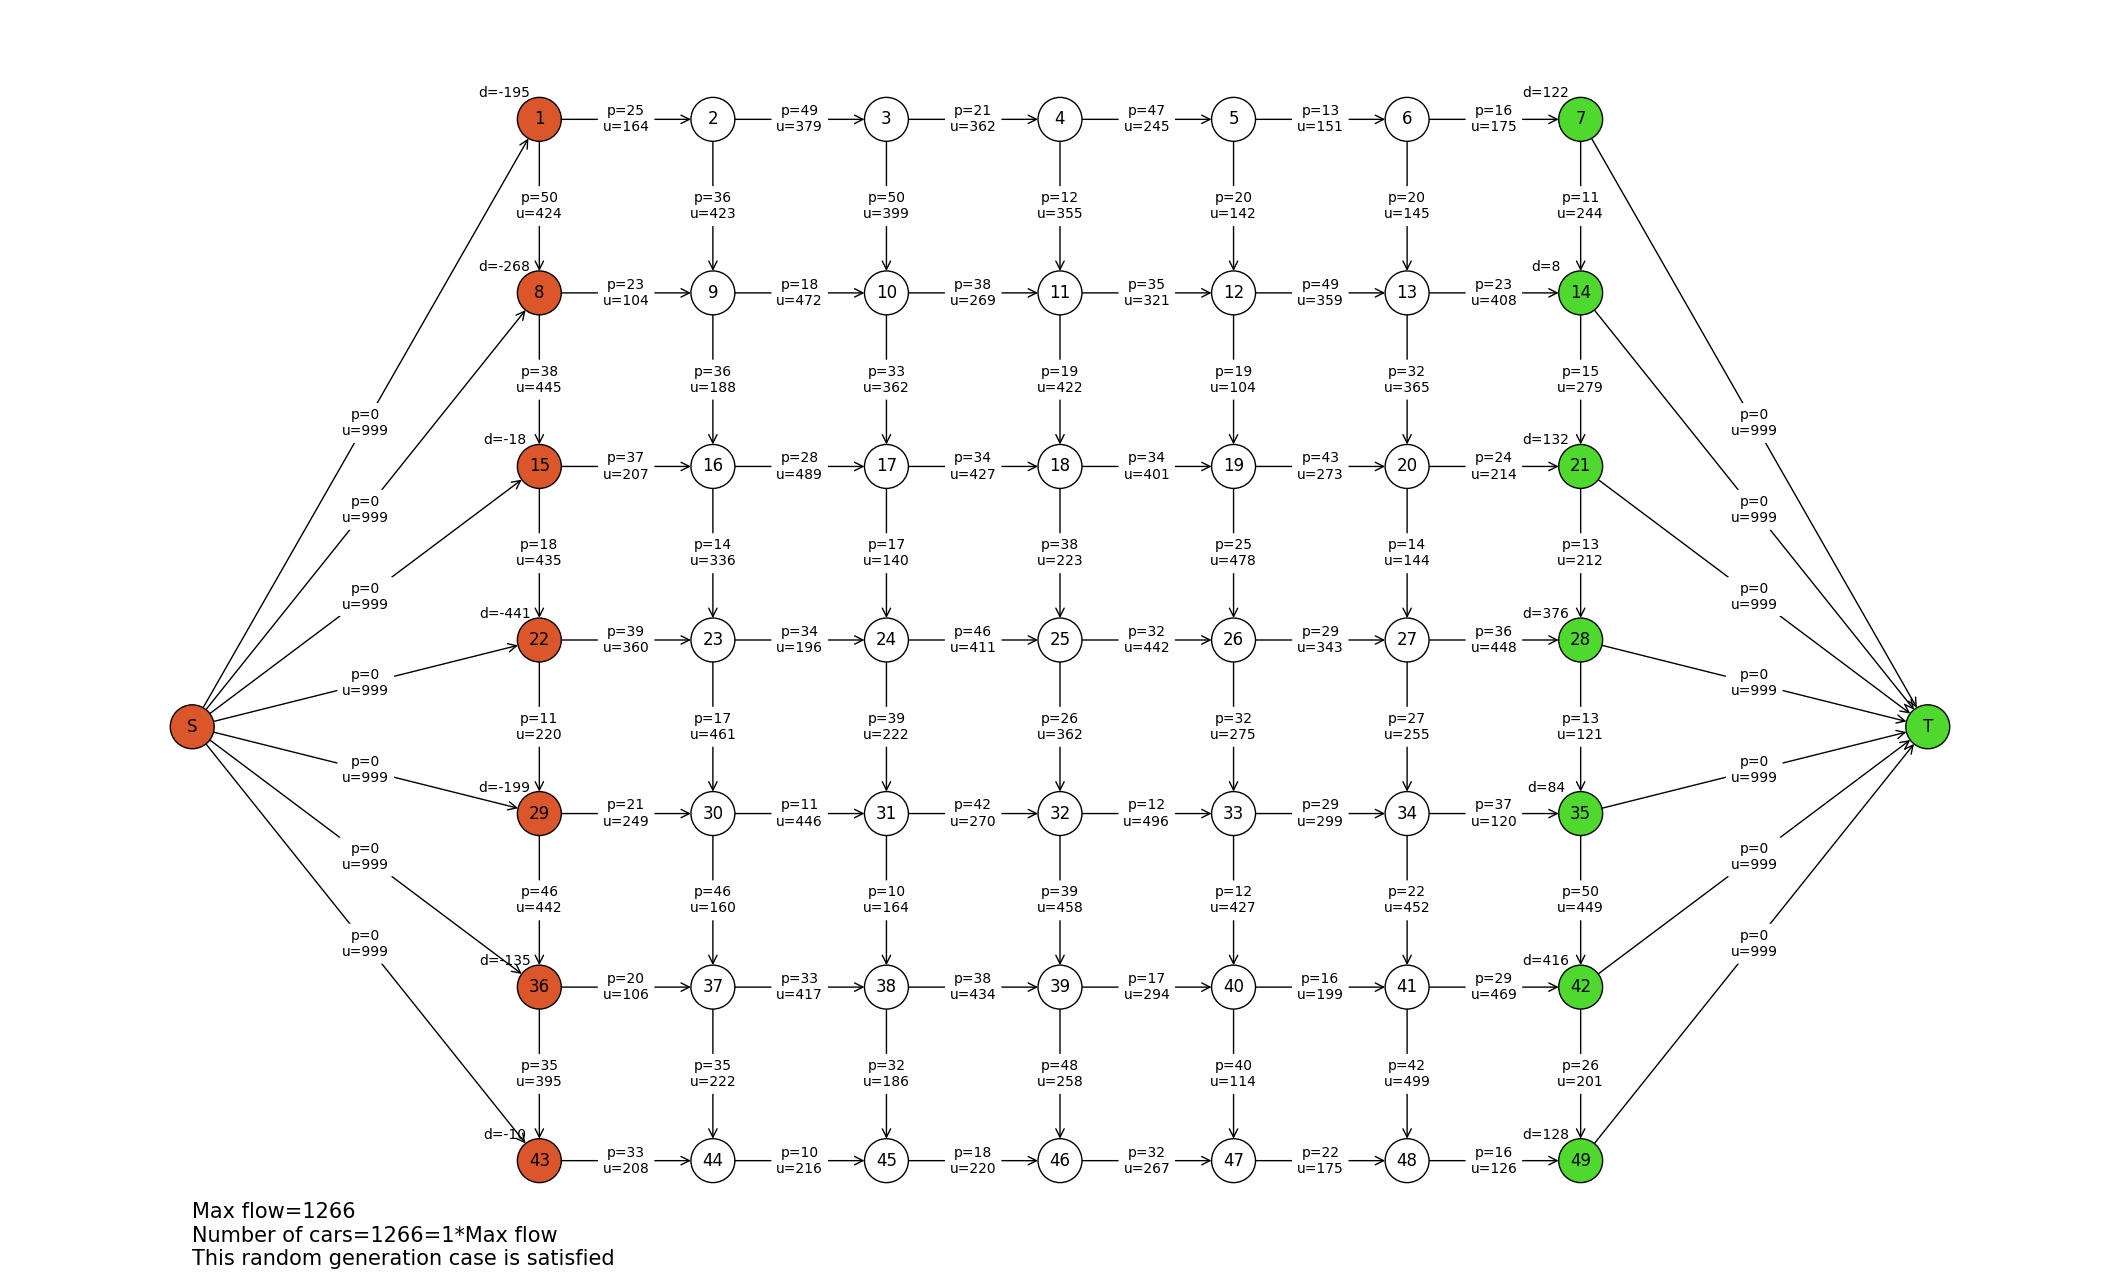

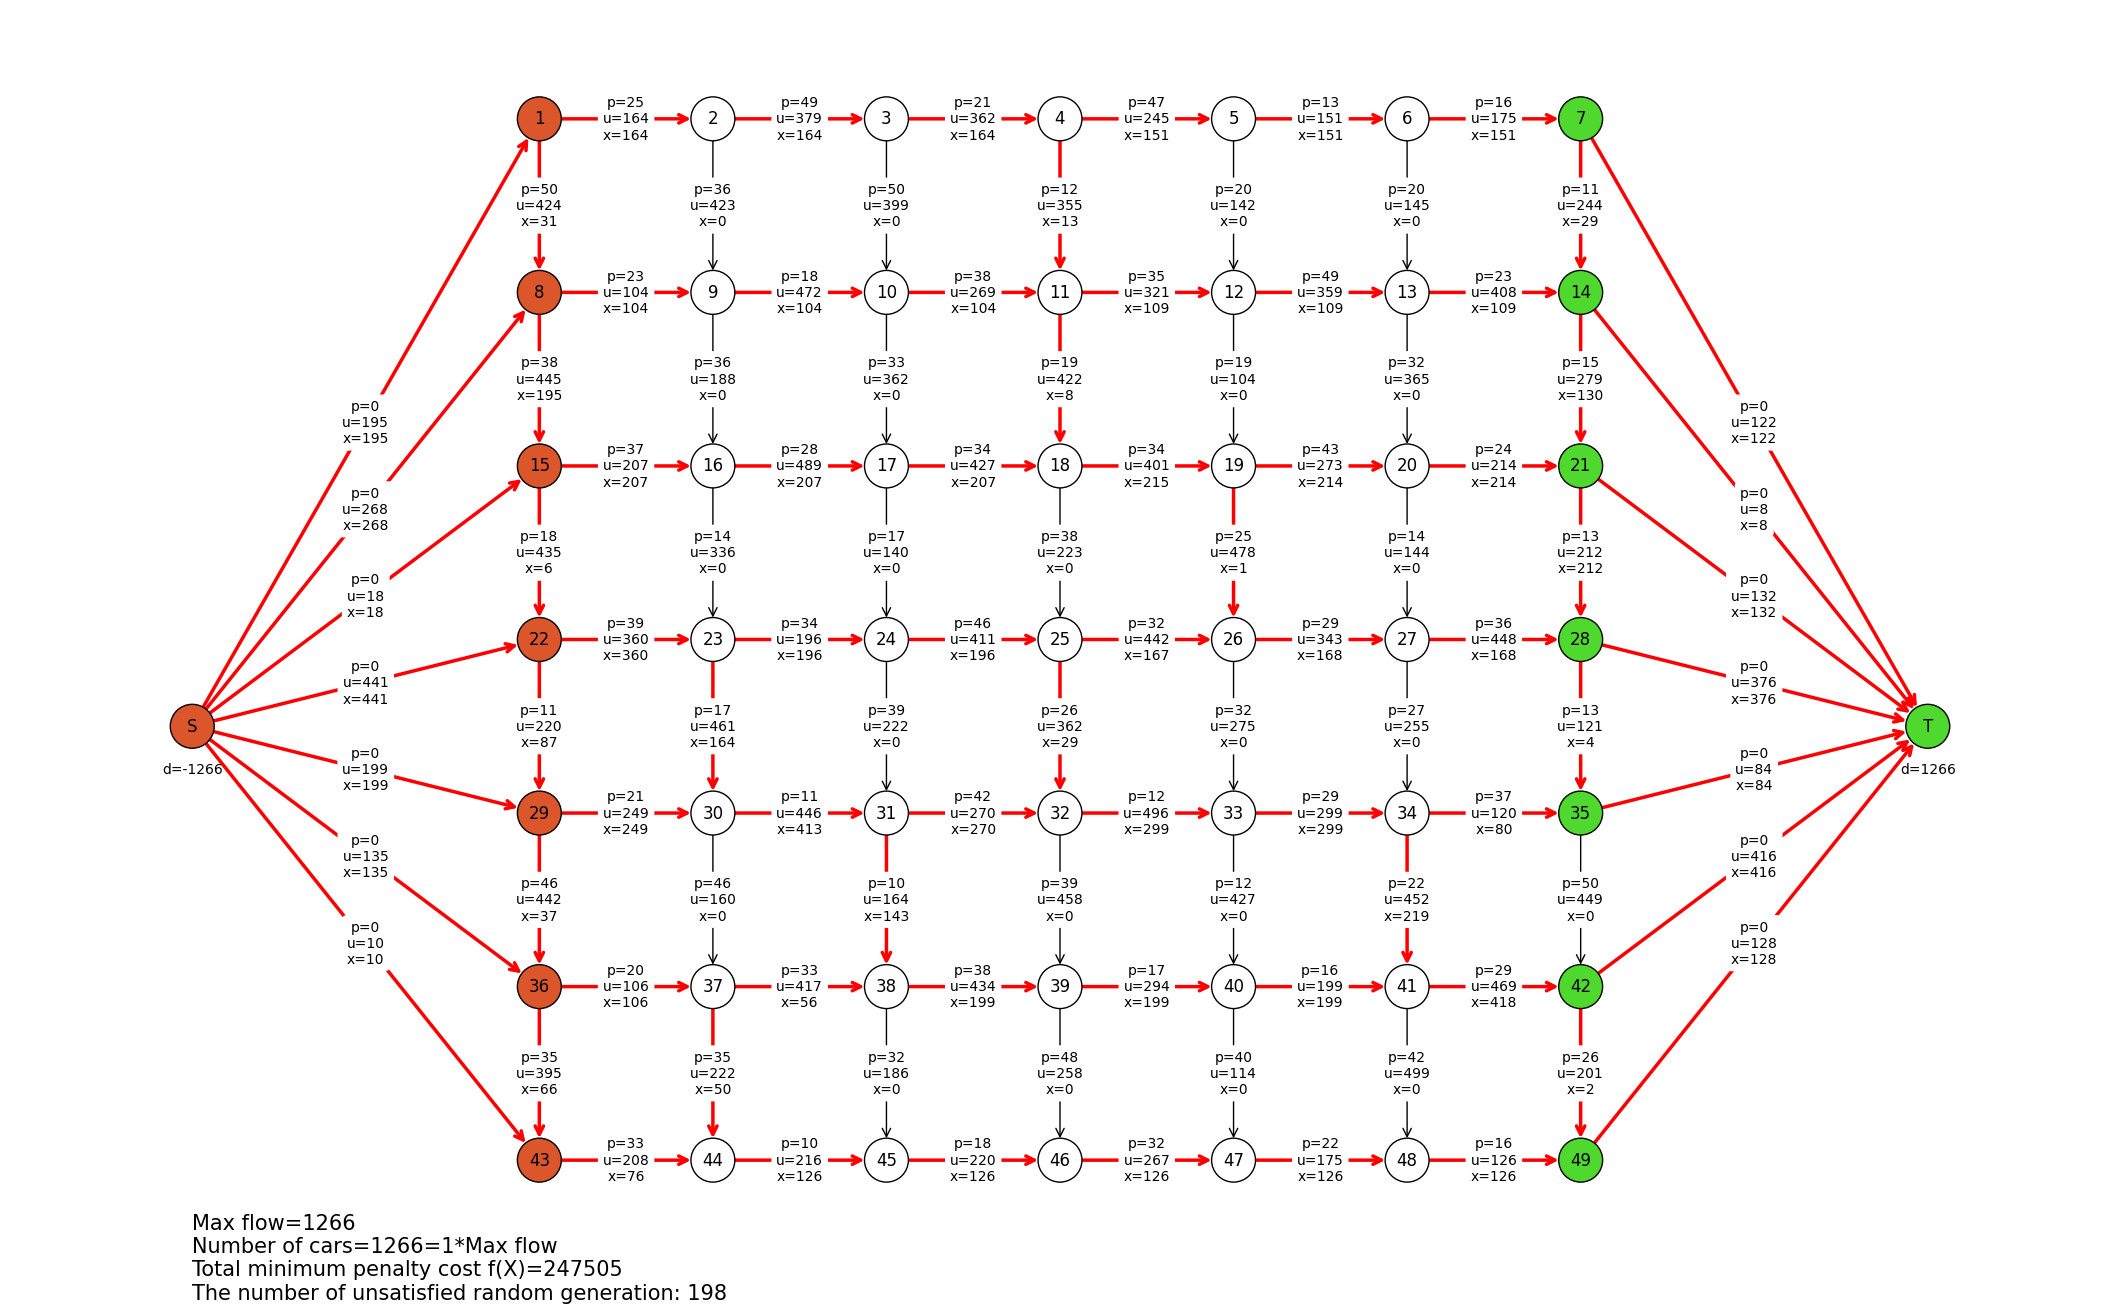

In [15]:
loop_time = 0 # số lần thí nghiệm không tìm được kế hoạch thoả mãn
coeff_of_num_cars = 1
num_cars = int(coeff_of_num_cars*max_flow)

# dùng cấu trúc try...except để phát hiện lỗi từ hàm capacity_scaling()
while(True):
    try:
        assign_att()
        H = deepcopy(G)
        convert_car_to_super_nodes(H)
        total_cost, flowDict = nx.capacity_scaling(H, capacity='u', weight='p', demand='d')
        if (loop_time < 27):
            continue
        # nếu lần thí thí nghiệm này tìm được kê hoạch thoả mãn
        showGraph(G, True)
        showGraphPath(H, loop_time)
        G = H
        break # kết thúc vòng lặp
    # nếu có lỗi từ hàm capacity_scaling()
    except Exception as e:
        loop_time += 1
        # in ra một vài thí nghiệm đầu tiên không thoả mãn
        if loop_time < 4:
            showGraph(G)
        # quay lại vòng lặp để thực hiện một thí nghiệm khác

Tạo một đồ thị mới lược bỏ các cung không nằm trong luồng sơ tán:

In [16]:
H = nx.DiGraph()

for u, v in G.edges:
    w = G[u][v]['x']*G[u][v]['p'] 
    if(G[u][v]['x'] > 0):
        H.add_node(u, color=G.nodes[u]['color'])
        H.add_node(v, color=G.nodes[v]['color'])
        H.add_edge(u, v, weight=w)

Hiển thị luồng sơ tán:

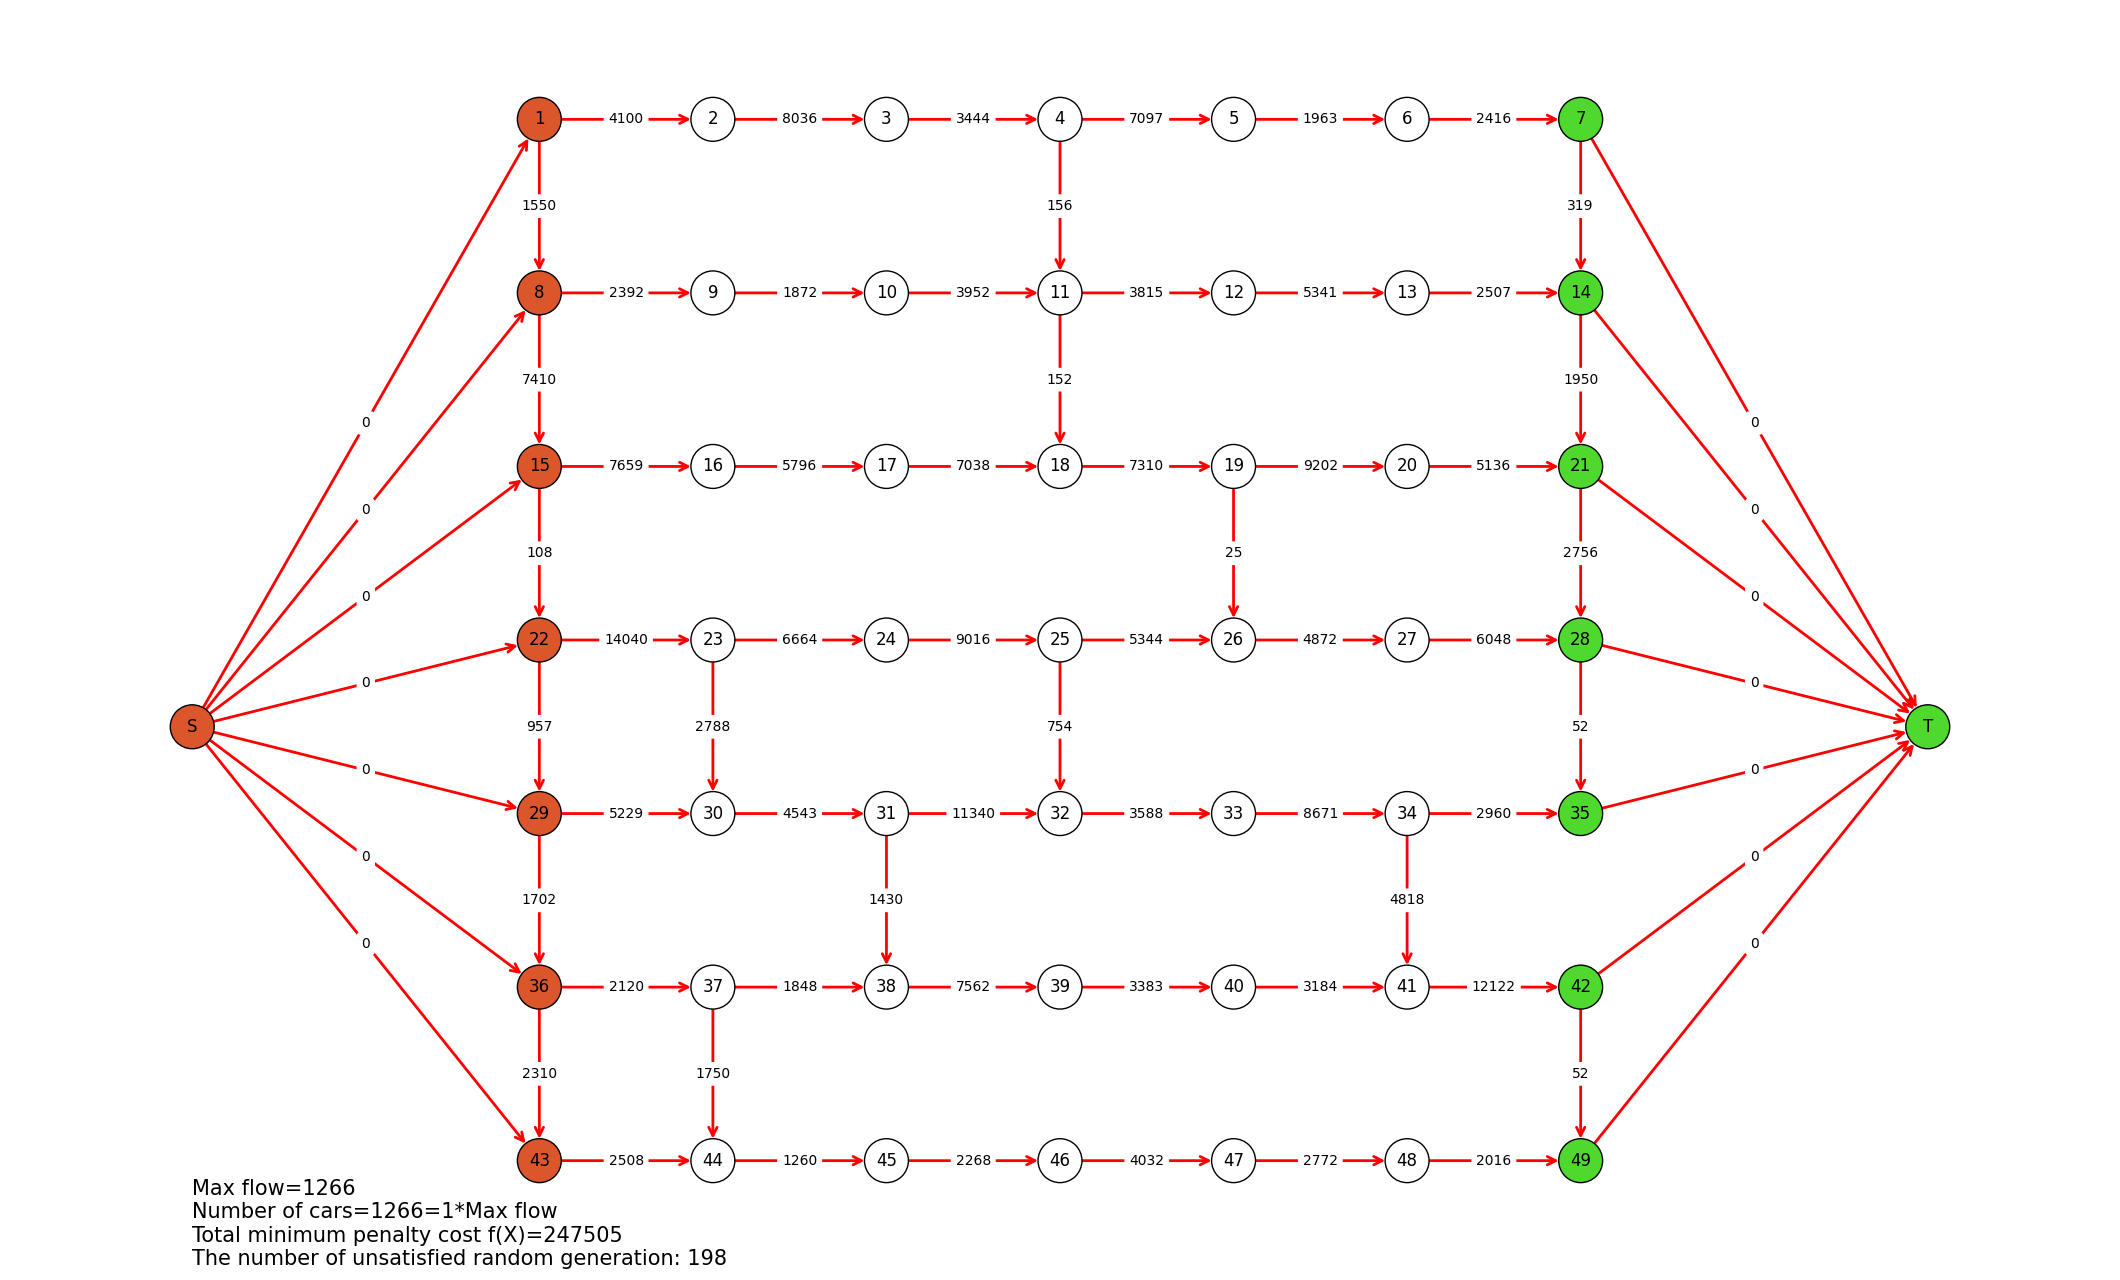

In [17]:
edges_label = nx.get_edge_attributes(H,'weight')
node_colors = list(nx.get_node_attributes(H, 'color').values())

nx.draw(H, pos=node_pos, with_labels=True, node_color=node_colors, edgecolors='black', arrowsize=15, edge_color='red', arrowstyle='->', node_size=1000, font_size=12, width=2.0) 
nx.draw_networkx_edge_labels(H, pos=node_pos, edge_labels=edges_label, rotate = False, font_size=10)
plt.text(min(node_pos[key][0] for key in node_pos), 
         min(node_pos[key][1]-0.6 for key in node_pos), 
         "Max flow={f}\nNumber of cars={n}={cf}*Max flow\nTotal minimum penalty cost f(X)={c}\nThe number of unsatisfied random generation: {l}"
         .format(f=max_flow, n=num_cars, c=total_cost, l=loop_time, cf=coeff_of_num_cars), fontsize=15)
plt.show()